In [2]:
# --- Setup logger ---
import logging
import sys
import os
import json

# --- Data manipulation ---
import numpy as np
import pandas as pd

# --- Data visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
os.listdir('../simulations/results')

['first_results_dt.json', 'second_results+gn.json']

In [7]:
# load the imulation data
import json

# Load dictionary from a JSON file
with open('../simulations/results/second_results+gn.json', 'r') as file:
    data = json.load(file)

print(data)
print(type(data))  # Should be <class 'dict'>


{'std_4': {'graph_neighbor_2': {'graph_neighbors': 2, 'score_base_estimator_val': 0.9558823529411765, 'score_base_estimator_test': 0.7070588235294117, 'setred_score': 0.7878176470588235, 'setred_std': 0.010396231350714446, 'setred_score_unlabel': 0.8001351752822342, 'setred_score_unlabel_std': 0.009567991942857923, 'score_list': [0.7741176470588236, 0.785, 0.765, 0.7979411764705883, 0.7776470588235294, 0.7879411764705883, 0.7735294117647059, 0.7785294117647059, 0.7552941176470588, 0.7997058823529412, 0.768235294117647, 0.8002941176470588, 0.7779411764705882, 0.7879411764705883, 0.7926470588235294, 0.7961764705882353, 0.7991176470588235, 0.7988235294117647, 0.7867647058823529, 0.7867647058823529, 0.78, 0.7770588235294118, 0.7926470588235294, 0.7964705882352942, 0.7823529411764706, 0.785, 0.7864705882352941, 0.8008823529411765, 0.8079411764705883, 0.7894117647058824, 0.7794117647058824, 0.7914705882352941, 0.7920588235294118, 0.8052941176470588, 0.7920588235294118, 0.7908823529411765, 0.

In [23]:
data['std_4']['graph_neighbor_2'].keys()

dict_keys(['graph_neighbors', 'score_base_estimator_val', 'score_base_estimator_test', 'setred_score', 'setred_std', 'setred_score_unlabel', 'setred_score_unlabel_std', 'score_list', 'score_unlabel_list'])

In [24]:
score_test_be = data['std_4']['graph_neighbor_2']['score_base_estimator_test']
score_test_it = data['std_4']['graph_neighbor_2']['score_list']
score_unlabel_it = data['std_4']['graph_neighbor_2']['score_unlabel_list']

In [36]:
# Compare accuracy of base estimator and iterative method
accuracy_be = data['std_4']['graph_neighbor_2']['score_base_estimator_test']
accuracy_setred = data['std_4']['graph_neighbor_2']['setred_score']
# Difference between the accuracy 
accuracy_diff = accuracy_setred - accuracy_be
percentage_diff = (accuracy_diff / accuracy_be) * 100
print(f"Accuracy of Base Estimator: {accuracy_be}")
print(f"Accuracy of SetRed: {accuracy_setred}")
print(f"Difference in Accuracy: {accuracy_diff}")
print(f"Percentage Difference: {percentage_diff:.2f}%")


Accuracy of Base Estimator: 0.7070588235294117
Accuracy of SetRed: 0.7878176470588235
Difference in Accuracy: 0.08075882352941177
Percentage Difference: 11.42%


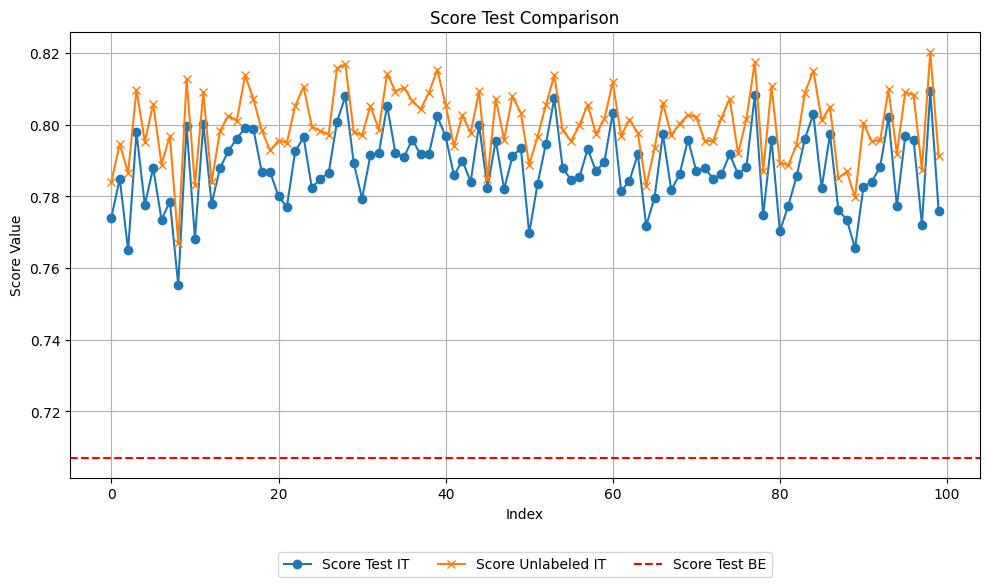

In [37]:
import matplotlib.pyplot as plt

# Plot the score test
plt.figure(figsize=(10, 6))
plt.plot(score_test_it, label='Score Test IT', marker='o')
plt.plot(score_unlabel_it, label='Score Unlabeled IT', marker='x')
# Add a horizontal line
plt.axhline(y=score_test_be, color='r', linestyle='--', label='Score Test BE')
# Put legend **below the chart**
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('Score Test Comparison')
plt.xlabel('Index')
plt.ylabel('Score Value')
plt.grid()
# Adjust layout so the legend fits
plt.tight_layout()
plt.show()
